# **CRM**

CRM, short for "Customer Relationship Management," is the concept of effectively managing the communication between businesses and their customers. The goal is to strengthen customer satisfaction by adopting a customer-centric approach, acquiring new customers, and retaining existing ones while also increasing the profitability of the business. In the world of CRM, various CRM applications are used to achieve this goal. These include customer lifecycle optimizations, communication through various campaigns and digital marketing, efforts to acquire customers through promotions, customer retention strategies, cross-selling, up-selling efforts, customer segmentation activities, and more. The overall aim is to make the entire customer relationship process more efficient based on data-driven strategies. These are strategic efforts implemented to acquire more customers and profits with less time and effort.

# **So What is the RFM ?**

The commonly used RFM analysis in CRM analytics gets its name from the initials of the recency, frequency, and monetary metrics. It allows for segmenting customers based on their purchase habits and enables strategic actions to be taken for each segment as needed. It is a rule-based technique used for customer segmentation.

## RFM Metrics

Recency: The customer's recency, either being new or the most recent purchase time. If one customer's recency score is 1 and another's is 10, the one with a score of 1 is better for us.

Frequency:The total number of purchases a customer has made 

Monetary: Monetary value of the total spending made by the customer.


## What will we do?

After performing the necessary basic tasks to understand and prepare the data, we will conduct the RFM analysis in three steps.

Calculation of RFM Metrics: We will calculate the Recency, Frequency, and Monetary values for each customer.

Calculation of RFM Scores: We will convert the obtained Recency, Frequency, and Monetary values into scores ranging from 1 to 5. Our goal is to convert them all to the same gender and make them comparable. A distribution from 5 to 1 needs to be calculated, assigning 5 to large values and 1 to small values. In this step, it is important to note that a customer who has shopped just yesterday or a few days ago is more valuable to us. Therefore, unlike Frequency and Monetary values, those with smaller Recency values will be assigned 5, and those with larger values will receive 1. Afterward, we concatenate the scores we have created as string values.

Creation and Analysis of RFM Segments: We group customers into simple segments based on the scores we have created.

# Customer Segmentation with RFM

## Business Problem

*An e-commerce company wants to segment its customers and determine marketing strategies based on these segments.

*The data set named 'Online Retail II' contains the sales of an online retail store based in the United Kingdom between 01/12/2009 and 09/12/2011.*

### Variables

- InvoiceNo: A unique number for each transaction or invoice. If it starts with 'C,' it indicates a canceled transaction.
- StockCode: Product code. A unique number for each product.
- Description: Product name
- Quantity: Quantity of products. Indicates how many of each product were sold on the invoices.
- InvoiceDate
- UnitPrice: Product price (in Sterling)
- CustomerID
- Country: Country of the customer

In [1]:
import datetime as dt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_ = pd.read_excel("/kaggle/input/online-retail/online_retail_II.xlsx", sheet_name="Year 2009-2010")

Since it's a large dataset and reading it takes time, I've named it df_ in case we need to run it again. When working with the dataset, if I encounter an issue, I'll create a copy to continue working on, named df, so that I won't waste time reloading the dataset. This way, if there is a problem, I can revert to the original state of the dataset.

In [3]:
df = df_.copy()

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom


In [5]:
df.shape

(525461, 8)

In [6]:
df.isnull().sum() 

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

There are missing values in the Customer ID and description variables. We will delete these values because without the customer's ID information, they do not carry any measurability value. Since I will conduct a segmentation study specific to the customer, we should clean these values.

Unique product count

In [7]:
df["Description"].nunique()

4681

In [8]:
df["Description"].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
Name: count, dtype: int64

Which product is the most frequently ordered?

In [9]:
df.groupby("Description").agg({"Quantity": "sum"}).head()

,Quantity
Description,
21494,-720
22467,-2
22719,2
DOORMAT UNION JACK GUNS AND ROSES,179
3 STRIPEY MICE FELTCRAFT,690


We couldn't observe it because quantity cannot be negative. We won't take any action for now. We'll address it in the data preprocessing section.

In [10]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925


Let's check how many unique invoices have been issued in total.

In [11]:
df["Invoice"].nunique()

28816

I'm calculating the full price information for each product to see how much money has been earned per invoice.

In [12]:
df["TotalPrice"] = df["Quantity"] * df["Price"] 


In [13]:
df.groupby("Invoice").agg({"TotalPrice": "sum"}).head()

,TotalPrice
Invoice,
489434,505.300
489435,145.800
489436,630.330
489437,310.750
489438,2286.240


## Data Preparation

In [14]:
df.shape

(525461, 9)

In [15]:
df.isnull().sum() 

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
TotalPrice          0
dtype: int64

There are missing values in the Customer ID and description variables. We will delete these values because without the customer's ID information, they do not carry any measurability value. Since I will conduct a segmentation study specific to the customer, we should clean these values.

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,525461.000,10.338,-9600.000,1.000,3.000,10.000,19152.000,107.424
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.000,4.689,-53594.360,1.250,2.100,4.210,25111.090,146.127
Customer ID,417534.000,15360.645,12346.000,13983.000,15311.000,16799.000,18287.000,1680.811
TotalPrice,525461.000,18.155,-53594.360,3.750,9.950,17.700,25111.090,160.333


In [17]:
df = df[(df['Quantity'] > 0)]

In [18]:
df.dropna(inplace=True)

There are values with '-' in the Quantity, Price, and Total Price variables. Let's remove the invoices for returned items from the dataset.

In [19]:
df["Invoice"] = df["Invoice"].astype(str)
df = df[~df["Invoice"].str.contains("C", na=False)]

## Calculating RFM Metrics

We will calculate Recency, Frequency, and Monetary values for each customer.

- Recency: the analysis date - the date of the customer's last purchase

- Frequency: the total number of purchases made by the customer

- Monetary: the total amount spent by the custome

First, we need to determine the analysis date. Since the dataset contains data from 2009 to 2011, and we didn't conduct the analysis during that period, we should define an analysis date.

We will consider the most recent date in the dataset and add 2 days to it to set it as the analysis date.

In [20]:
df["InvoiceDate"].max()  #ilgili müşterinin son satın alma tarihi

Timestamp('2010-12-09 20:01:00')

In [21]:
today_date = dt.datetime(2010, 12, 11)

In [22]:
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'Invoice': lambda Invoice: Invoice.nunique(),   
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [23]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.000,165,11,372.860
12347.000,3,2,1323.320
12348.000,74,1,222.160
12349.000,43,3,2671.140
12351.000,11,1,300.930


We have changed the variable names with RFM metrics.

In [24]:
rfm.columns = ['recency', 'frequency', 'monetary']

I'm checking.

In [25]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4314.000,91.270,96.944,1.000,18.000,53.000,136.000,374.000
frequency,4314.000,4.454,8.169,1.000,1.000,2.000,5.000,205.000
monetary,4314.000,2047.289,8912.523,0.000,307.950,705.550,1722.802,349164.350


We are removing the ones with a Monetary value of 0

In [26]:
rfm = rfm[rfm["monetary"] > 0] 

In [27]:
rfm.shape

(4312, 3)

The next step is to convert data metrics into data scores.

## Calculating RFM Scores

R and F values are sufficient for RFM scores, and we have set Monetary values just for observation.

In [28]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

We need to create a score variable based on these values. We should combine R and F values, convert them to string values, and concatenate them.

In [29]:
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [30]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.000,165,11,372.860,2,5,2,25
12347.000,3,2,1323.320,5,2,4,52
12348.000,74,1,222.160,2,1,1,21
12349.000,43,3,2671.140,3,3,5,33
12351.000,11,1,300.930,5,1,2,51


## Creating & Analysing RFM Segments

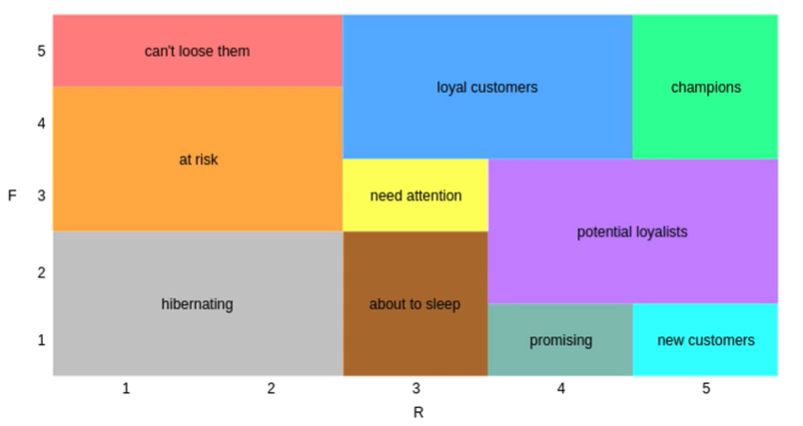

In [31]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',  
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention', 
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [32]:
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True) 
rfm['segment'].head()

Customer ID
12346.000             cant_loose
12347.000    potential_loyalists
12348.000            hibernating
12349.000         need_attention
12351.000          new_customers
Name: segment, dtype: object

In [33]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep       53.819   343     1.201   343  441.320   343
at_Risk             152.159   611     3.074   611 1188.878   611
cant_loose          124.117    77     9.117    77 4099.450    77
champions             7.119   663    12.554   663 6852.264   663
hibernating         213.886  1015     1.126  1015  403.978  1015
loyal_customers      36.287   742     6.830   742 2746.067   742
need_attention       53.266   207     2.449   207 1060.357   207
new_customers         8.580    50     1.000    50  386.199    50
potential_loyalists  18.793   517     2.017   517  729.511   517
promising            25.747    87     1.000    87  367.087    87

When we want to identify customers we are about to lose.

In [34]:
rfm[rfm["segment"] == "cant_loose"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
12346.000,165,11,372.860,2,5,2,25,cant_loose
12380.000,101,7,6951.490,2,5,5,25,cant_loose
12482.000,212,29,23691.400,1,5,5,15,cant_loose
12510.000,95,7,4195.450,2,5,5,25,cant_loose
12891.000,94,8,509.500,2,5,3,25,cant_loose


If we only want to access their IDs, we add 'index' to the end.

In [35]:
rfm[rfm["segment"] == "cant_loose"].index 

Index([12346.0, 12380.0, 12482.0, 12510.0, 12891.0, 12932.0, 13044.0, 13313.0,
       13680.0, 13782.0, 13799.0, 13856.0, 14025.0, 14063.0, 14160.0, 14221.0,
       14548.0, 14607.0, 14685.0, 14745.0, 15003.0, 15013.0, 15015.0, 15125.0,
       15141.0, 15222.0, 15306.0, 15321.0, 15359.0, 15369.0, 15372.0, 15443.0,
       15538.0, 15607.0, 15633.0, 15722.0, 15751.0, 15754.0, 15768.0, 15911.0,
       15912.0, 16027.0, 16032.0, 16158.0, 16177.0, 16197.0, 16335.0, 16467.0,
       16631.0, 16742.0, 16743.0, 16875.0, 16986.0, 17021.0, 17032.0, 17092.0,
       17113.0, 17157.0, 17188.0, 17230.0, 17268.0, 17426.0, 17448.0, 17454.0,
       17512.0, 17578.0, 17602.0, 17651.0, 17940.0, 17969.0, 17988.0, 18009.0,
       18051.0, 18064.0, 18094.0, 18251.0, 18258.0],
      dtype='float64', name='Customer ID')